In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

# Project 1
## Read Data

In [2]:
def get_data(symbol):
    START_DATE = datetime(2017, 1, 2)
    today = datetime.now()
    END_DATE = datetime(today.year, today.month, today.day)
    df = yf.download(symbol, start=START_DATE, end=END_DATE)
    df["profit rate"] = ((df['Close'] - df['Open']) / df['Open']) * 100
    return df
df = get_data("BTC-USD")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,profit rate
Date,,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,3.597437
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,2.316503
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,2.176976
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,10.563956
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,-12.392691
...,...,...,...,...,...,...,...
2022-05-18,30424.478516,30618.716797,28720.271484,28720.271484,28720.271484,31285268319,-5.601434
2022-05-19,28720.359375,30430.751953,28708.955078,30314.333984,30314.333984,33773447707,5.549981
2022-05-20,30311.119141,30664.976562,28793.605469,29200.740234,29200.740234,30749382605,-3.663273


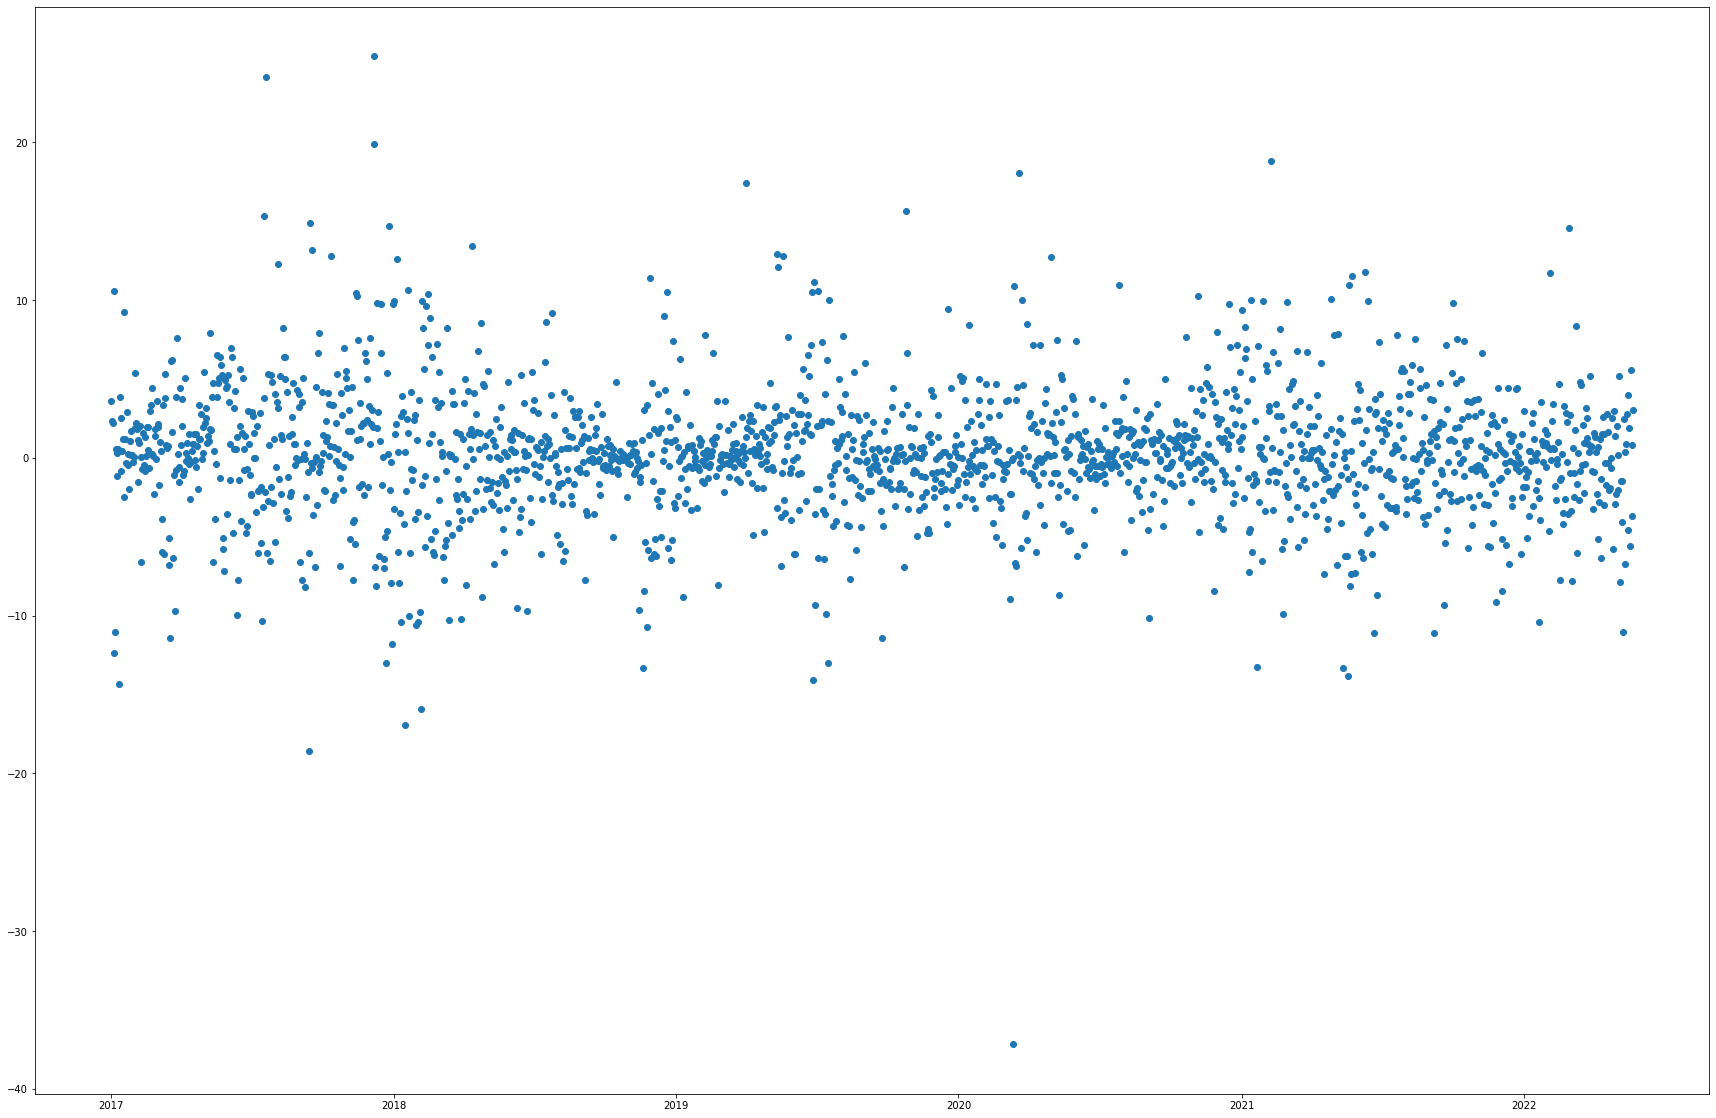

In [3]:
plt.figure(figsize=(30,20))
plt.scatter(df.index,df["profit rate"])
plt.show()

### Data Split

In [4]:
x_train_cluster, x_test_cluster = train_test_split(df["profit rate"], test_size=0.2, random_state=42)
x_train_cluster = np.array(x_train_cluster).reshape(-1,1)
x_test_cluster = np.array(x_test_cluster).reshape(-1,1)

## Build Model

In [5]:
kmeans_model = KMeans(n_clusters=5, n_init=20,
                      tol=0.001, random_state=42)
kmeans_model.fit(x_train_cluster)


KMeans(n_clusters=5, n_init=20, random_state=42, tol=0.001)

In [6]:
result = pd.DataFrame({"x":x_train_cluster[:,0],
                       "y":kmeans_model.predict(x_train_cluster)})
result

,x,y
0,1.227815,0
1,0.730937,0
2,-0.400593,0
3,12.103217,2
4,-0.984690,0
...,...,...
1569,4.682439,4
1570,0.085852,0
1571,12.933347,2
1572,5.412494,4


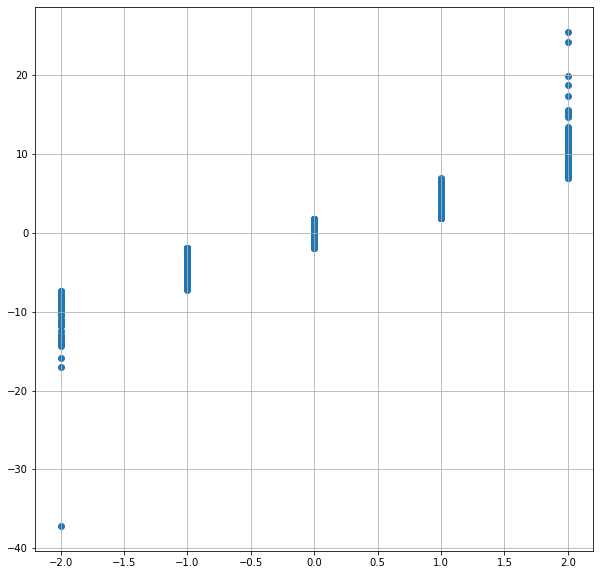

In [7]:
visual_train = result.copy()
visual_train["y"] = visual_train["y"].replace([0, 1, 2, 3, 4], [0, -1, 2, -2, 1])
plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(visual_train["y"],visual_train["x"])


## Testing model

In [8]:
y_hat_cluster = kmeans_model.predict(x_test_cluster)
test = pd.DataFrame({"x":x_test_cluster[:,0],"y":y_hat_cluster})
test

,x,y
0,2.273297,4
1,-1.393514,0
2,1.829108,4
3,4.841366,4
4,3.287438,4
...,...,...
389,-1.357957,0
390,0.020300,0
391,-1.873400,0
392,-1.412297,0


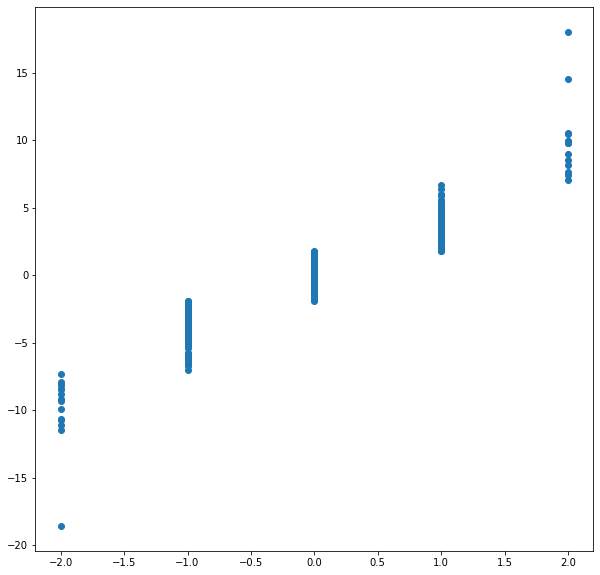

In [9]:
visual_test = test.copy()
visual_test["y"] = visual_test["y"].replace([0, 1, 2, 3, 4], [0, -1, 2, -2, 1])
plt.figure(figsize=(10,10))
plt.scatter(visual_test["y"],visual_test["x"])


In [26]:
btc_data = np.array(df["profit rate"].values).reshape(-1,1)
df["profit rate cluster"] = kmeans_model.predict(btc_data)
df["profit rate cluster"] = df["profit rate cluster"].replace([0, 1, 2, 3, 4], [0, -1, 2, -2, 1])
df

,Open,High,Low,Close,Adj Close,Volume,profit rate,profit rate cluster
Date,,,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,3.597437,1
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,2.316503,1
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,2.176976,1
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,10.563956,2
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,-12.392691,-2
...,...,...,...,...,...,...,...,...
2022-05-18,30424.478516,30618.716797,28720.271484,28720.271484,28720.271484,31285268319,-5.601434,-1
2022-05-19,28720.359375,30430.751953,28708.955078,30314.333984,30314.333984,33773447707,5.549981,1
2022-05-20,30311.119141,30664.976562,28793.605469,29200.740234,29200.740234,30749382605,-3.663273,-1


/home/sepehr/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='profit rate cluster', ylabel='count'>

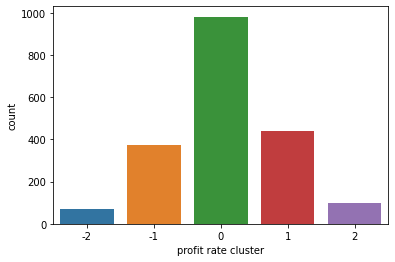

In [12]:
sns.countplot(df["profit rate cluster"])

# Project 2
## Get Data

In [13]:
oil_data = get_data('CL=F')
oil_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,profit rate
Date,,,,,,,
2017-01-03,54.200001,55.240002,52.110001,52.330002,52.330002,727793,-3.450182
2017-01-04,52.490002,53.430000,52.150002,53.259998,53.259998,512641,1.466940
2017-01-05,53.389999,54.119999,52.790001,53.759998,53.759998,517362,0.693012
2017-01-06,53.730000,54.320000,53.320000,53.990002,53.990002,528333,0.483905
2017-01-09,53.750000,53.830002,51.759998,51.959999,51.959999,564893,-3.330234
...,...,...,...,...,...,...,...
2022-05-16,110.980003,114.900002,108.110001,114.199997,114.199997,289127,2.901418
2022-05-17,113.870003,115.559998,111.750000,112.400002,112.400002,252630,-1.290947
2022-05-18,113.660004,115.419998,108.459999,109.589996,109.589996,103669,-3.580862


In [14]:
gold_data = get_data('GC=F')
gold_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,profit rate
Date,,,,,,,
2017-01-03,1155.199951,1160.800049,1146.500000,1160.400024,1160.400024,52,0.450145
2017-01-04,1156.300049,1165.000000,1156.300049,1163.800049,1163.800049,36,0.648621
2017-01-05,1172.000000,1183.300049,1171.500000,1179.699951,1179.699951,500,0.656992
2017-01-06,1176.500000,1176.500000,1171.900024,1171.900024,1171.900024,16,-0.390988
2017-01-09,1173.900024,1183.599976,1173.000000,1183.500000,1183.500000,62,0.817785
...,...,...,...,...,...,...,...
2022-05-16,1790.500000,1813.500000,1787.000000,1813.500000,1813.500000,34,1.284557
2022-05-17,1824.900024,1828.599976,1816.699951,1818.199951,1818.199951,121,-0.367147
2022-05-18,1815.000000,1819.699951,1805.000000,1815.900024,1815.900024,311,0.049588


In [15]:
gold_profit = pd.DataFrame({"gold profit":gold_data["profit rate"]})
oil_profit = pd.DataFrame({"oil profit":oil_data["profit rate"]})
btc_profit = pd.DataFrame({"btc profit":df["profit rate"],"btc profit cluster":df["profit rate cluster"]})

In [16]:
profits_df = gold_profit.join(oil_profit).join(btc_profit)
profits_df = profits_df.dropna()
profits_df

,gold profit,oil profit,btc profit,btc profit cluster
Date,,,,
2017-01-03,0.450145,-3.450182,2.176976,1
2017-01-04,0.648621,1.466940,10.563956,2
2017-01-05,0.656992,0.693012,-12.392691,-2
2017-01-06,-0.390988,0.483905,-11.046597,-2
2017-01-09,0.817785,-3.330234,-1.140551,0
...,...,...,...,...
2022-05-16,1.284557,2.901418,-4.604650,-1
2022-05-17,-0.367147,-1.290947,1.886818,1
2022-05-18,0.049588,-3.580862,-5.601434,-1


Correlation coefficient :
 [[1.         0.05860977]
 [0.05860977 1.        ]]


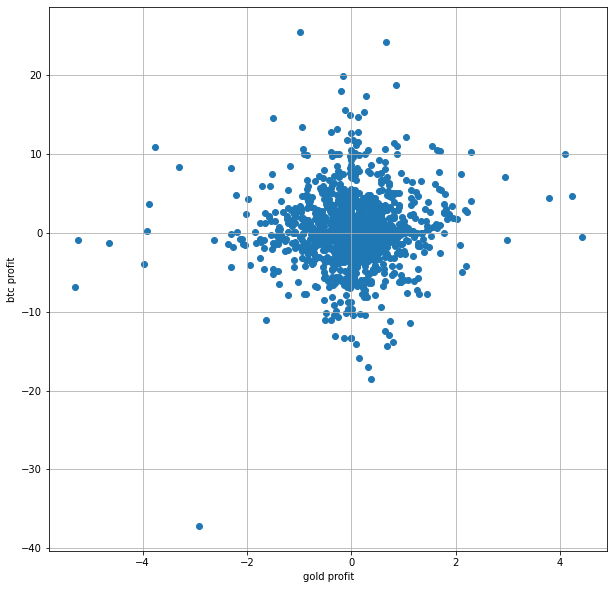

In [17]:
print("Correlation coefficient :\n", np.corrcoef(profits_df["gold profit"],profits_df["btc profit"]))
plt.figure(figsize=(10,10))
plt.grid()
plt.xlabel("gold profit")
plt.ylabel("btc profit")
plt.scatter(profits_df["gold profit"],profits_df["btc profit"])


In [18]:
print("negative lag: ")

for i in range(1,6):
    x = profits_df["gold profit"].shift(-i).dropna()
    y = profits_df["btc profit"][i:]
    print(np.corrcoef(x,y))

print("positive lag: ")

for i in range(1,6):
    x = profits_df["gold profit"].shift(i).dropna()
    y = profits_df["btc profit"][:-i]
    print(np.corrcoef(x,y))

negative lag: 
[[1.      0.05845]
 [0.05845 1.     ]]
[[1.         0.05722294]
 [0.05722294 1.        ]]
[[1.         0.05910688]
 [0.05910688 1.        ]]
[[1.         0.05831007]
 [0.05831007 1.        ]]
[[1.         0.05857781]
 [0.05857781 1.        ]]
positive lag: 
[[1.         0.05873853]
 [0.05873853 1.        ]]
[[1.         0.05706077]
 [0.05706077 1.        ]]
[[1.         0.05714644]
 [0.05714644 1.        ]]
[[1.         0.05727697]
 [0.05727697 1.        ]]
[[1.         0.05865144]
 [0.05865144 1.        ]]


Correlation coefficient :
 [[1.         0.04575888]
 [0.04575888 1.        ]]


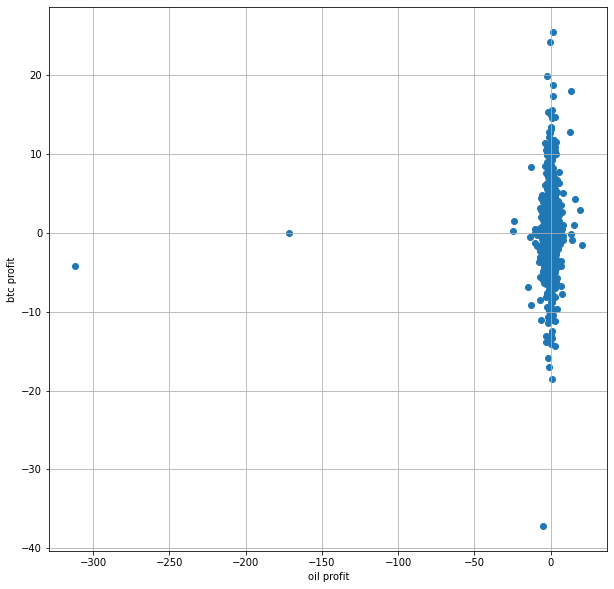

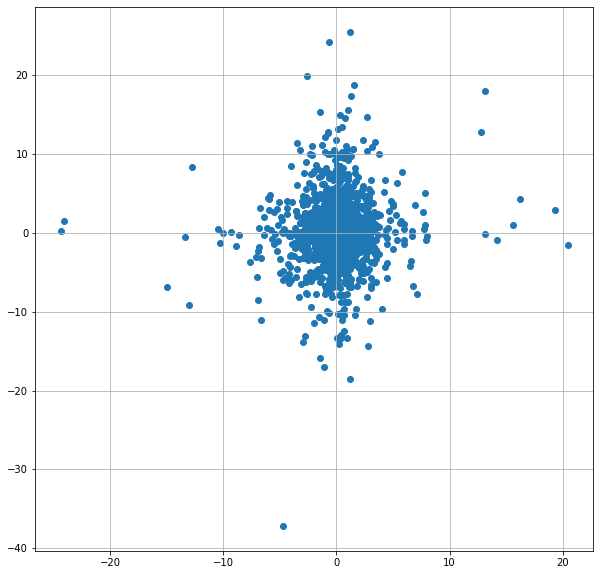

In [19]:
print("Correlation coefficient :\n", np.corrcoef(profits_df["oil profit"],profits_df["btc profit"]))
plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(profits_df["oil profit"],profits_df["btc profit"])
plt.xlabel("oil profit")
plt.ylabel("btc profit")
profits_df2 = profits_df[profits_df["oil profit"] > -50]
plt.figure(figsize=(10,10))
plt.grid()

plt.scatter(profits_df2["oil profit"],profits_df2["btc profit"])

In [20]:
print("negative lag: ")

for i in range(1,6):
    x = profits_df["oil profit"].shift(-i).dropna()
    y = profits_df["btc profit"][i:]
    print(np.corrcoef(x,y))

print("positive lag: ")

for i in range(1,6):
    x = profits_df["oil profit"].shift(i).dropna()
    y = profits_df["btc profit"][:-i]
    print(np.corrcoef(x,y))

negative lag: 
[[1.         0.04586049]
 [0.04586049 1.        ]]
[[1.         0.04565653]
 [0.04565653 1.        ]]
[[1.         0.04599394]
 [0.04599394 1.        ]]
[[1.         0.04624596]
 [0.04624596 1.        ]]
[[1.         0.04617682]
 [0.04617682 1.        ]]
positive lag: 
[[1.         0.04589395]
 [0.04589395 1.        ]]
[[1.         0.04564957]
 [0.04564957 1.        ]]
[[1.         0.04536302]
 [0.04536302 1.        ]]
[[1.         0.04539134]
 [0.04539134 1.        ]]
[[1.         0.04566811]
 [0.04566811 1.        ]]


# Project 3
## Prepare data

In [21]:
data = df[["profit rate","profit rate cluster"]]
data["profit rate cluster"].replace([-2,2], [-1,1],inplace=True)
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(np.array(data["profit rate"]).reshape(-1,1))

/tmp/ipykernel_8588/3677053945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["profit rate cluster"].replace([-2,2], [-1,1],inplace=True)


In [40]:
PAST_HISTORY = 4
FUTURE_TARGET = 0
SPLIT_RATE = int(len(norm_data) * 0.8) # 80 percent

## Split data to train & set

In [41]:
input_data = []
output_data = []

for i in range(PAST_HISTORY, len(norm_data)+1): 
    indices = range(i-PAST_HISTORY, i)

    input_data.append(np.reshape(norm_data[indices], (PAST_HISTORY)))
    try:
        output_data.append(data["profit rate cluster"].iloc[i+FUTURE_TARGET])
    except:
        output_data.append(np.nan)

input_data,output_data = np.array(input_data), np.array(output_data)

In [42]:
x_train, x_test = input_data[:SPLIT_RATE], input_data[SPLIT_RATE:]
y_train, y_test = output_data[:SPLIT_RATE], output_data[SPLIT_RATE:]

## Balancing data

In [43]:
ros = RandomOverSampler(sampling_strategy='auto')# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x_train, y_train)


## Build the model

In [44]:
model = MLPClassifier(alpha=0.0001, learning_rate_init=0.001, max_iter=300)

In [45]:
model.fit(x_ros,y_ros)

MLPClassifier(max_iter=300)

In [46]:
final_train = pd.DataFrame({"y":y_train,"y_hat":model.predict(x_train)})
final_train

,y,y_hat
0,-1.0,-1.0
1,-1.0,1.0
2,0.0,1.0
3,0.0,-1.0
4,0.0,-1.0
...,...,...
1569,0.0,0.0
1570,-1.0,0.0
1571,-1.0,0.0
1572,1.0,0.0


In [47]:
print(classification_report(final_train["y"],final_train["y_hat"]))

              precision    recall  f1-score   support

        -1.0       0.33      0.24      0.28       337
         0.0       0.57      0.79      0.66       804
         1.0       0.38      0.18      0.25       433

    accuracy                           0.51      1574
   macro avg       0.43      0.41      0.40      1574
weighted avg       0.47      0.51      0.47      1574



## Testing the model

In [48]:
final_test = pd.DataFrame({"y":y_test,"y_hat":model.predict(x_test)})
print(classification_report(final_test["y"][:-1],final_test["y_hat"][:-1]))
final_test

              precision    recall  f1-score   support

        -1.0       0.23      0.14      0.17       107
         0.0       0.47      0.74      0.58       178
         1.0       0.33      0.14      0.20       105

    accuracy                           0.42       390
   macro avg       0.35      0.34      0.32       390
weighted avg       0.37      0.42      0.36       390



,y,y_hat
0,0.0,0.0
1,-1.0,-1.0
2,1.0,1.0
3,0.0,-1.0
4,-1.0,0.0
...,...,...
386,1.0,1.0
387,-1.0,-1.0
388,0.0,0.0
389,1.0,-1.0
